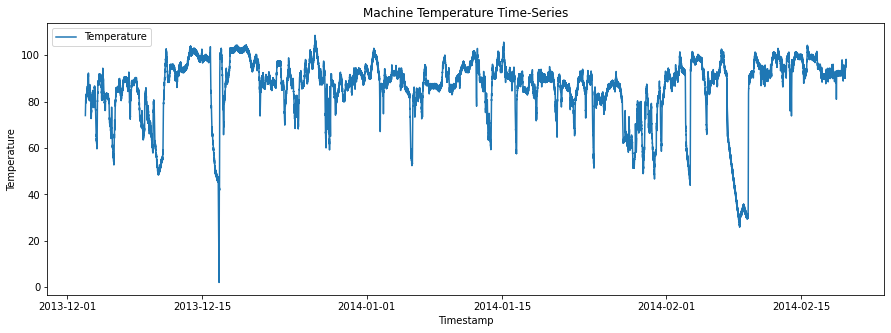

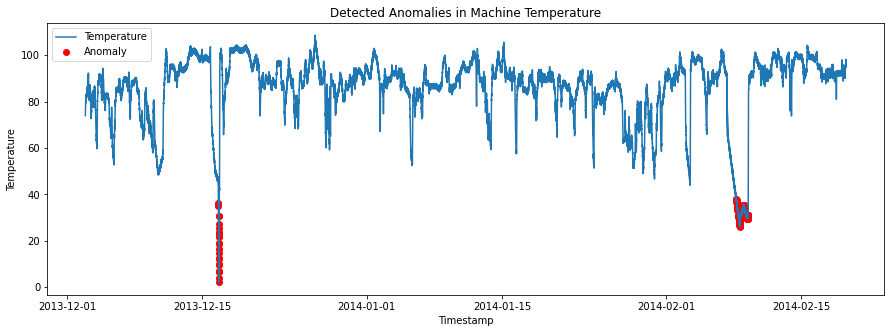

Anomalies detected:
                         value  anomaly_score  anomaly
timestamp                                             
2013-12-16 15:45:00  36.249653      -0.000493       -1
2013-12-16 15:50:00  35.072456      -0.003295       -1
2013-12-16 16:00:00  30.699649      -0.009756       -1
2013-12-16 16:05:00  30.504461      -0.010755       -1
2013-12-16 16:10:00  27.212228      -0.036864       -1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load dataset from NAB (Numenta Anomaly Benchmark)
url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv'
data = pd.read_csv(url)

# Convert timestamp column to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Data Visualization
plt.figure(figsize=(15,5))
plt.plot(data, label='Temperature')
plt.title('Machine Temperature Time-Series')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Data Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Isolation Forest Model
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(data_scaled)
data['anomaly_score'] = model.decision_function(data_scaled)
data['anomaly'] = model.predict(data_scaled)

# Display anomalies (anomaly = -1)
anomalies = data[data['anomaly'] == -1]

# Visualization of anomaly detection results
plt.figure(figsize=(15,5))
plt.plot(data.index, data['value'], label='Temperature')
plt.scatter(anomalies.index, anomalies['value'], color='red', label='Anomaly')
plt.title('Detected Anomalies in Machine Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Display some detected anomalies
print("Anomalies detected:")
print(anomalies.head())

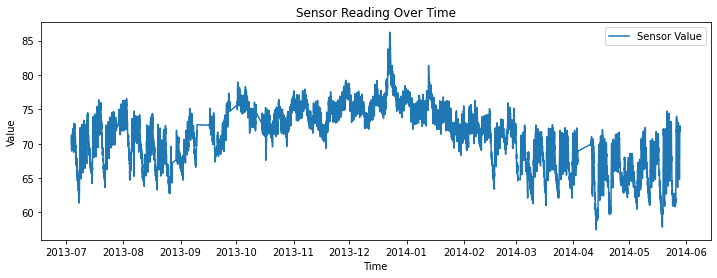

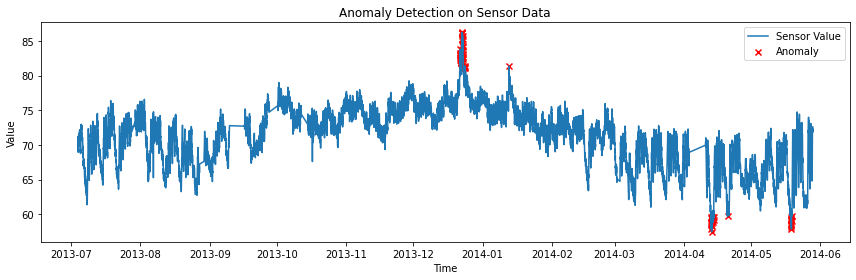

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# === Load Dataset ===
file_path = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv"
df = pd.read_csv(file_path)

# === Format Waktu dan Nilai ===
df.columns = ['timestamp', 'value']
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# === Visualisasi Awal ===
plt.figure(figsize=(12, 4))
plt.plot(df['value'], label='Sensor Value')
plt.title("Sensor Reading Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# === Anomaly Detection ===
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[['value']])
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly

# === Visualisasi Hasil Deteksi ===
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['value'], label='Sensor Value')
plt.scatter(df[df['anomaly'] == 1].index, df[df['anomaly'] == 1]['value'],
            color='red', label='Anomaly', marker='x')
plt.title("Anomaly Detection on Sensor Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

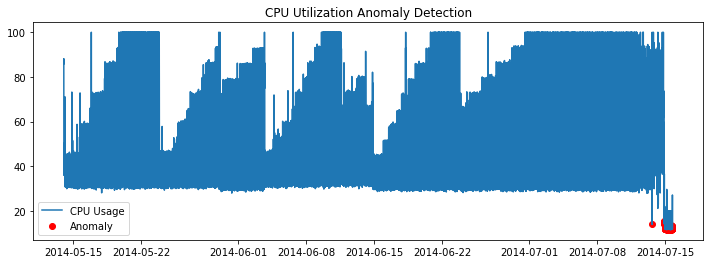

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load CPU Utilization dataset
df_cpu = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/cpu_utilization_asg_misconfiguration.csv', header=0)
df_cpu['timestamp'] = pd.to_datetime(df_cpu['timestamp'])
df_cpu.set_index('timestamp', inplace=True)

# Anomaly Detection
model_cpu = IsolationForest(contamination=0.01, random_state=42)
df_cpu['anomaly'] = model_cpu.fit_predict(df_cpu[['value']])
df_cpu['anomaly'] = df_cpu['anomaly'].map({1: 0, -1: 1})

# Visualization
plt.figure(figsize=(12, 4))
plt.plot(df_cpu.index, df_cpu['value'], label='CPU Usage')
plt.scatter(df_cpu[df_cpu['anomaly'] == 1].index, df_cpu[df_cpu['anomaly'] == 1]['value'], color='red', label='Anomaly')
plt.title('CPU Utilization Anomaly Detection')
plt.legend()
plt.show()

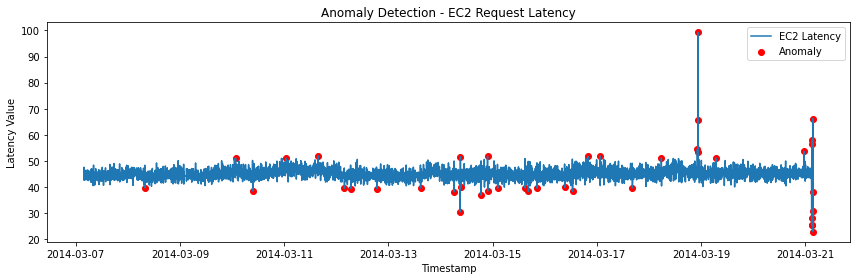

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load EC2 latency dataset (tanpa 'names='!)
df_ec2 = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ec2_request_latency_system_failure.csv')

# Convert timestamp column
df_ec2['timestamp'] = pd.to_datetime(df_ec2['timestamp'])
df_ec2.set_index('timestamp', inplace=True)

# Anomaly detection
model = IsolationForest(contamination=0.01, random_state=42)
df_ec2['anomaly'] = model.fit_predict(df_ec2[['value']])
df_ec2['anomaly'] = df_ec2['anomaly'].map({1: 0, -1: 1})

# Visualize
plt.figure(figsize=(12, 4))
plt.plot(df_ec2.index, df_ec2['value'], label='EC2 Latency')
plt.scatter(df_ec2[df_ec2['anomaly'] == 1].index, df_ec2[df_ec2['anomaly'] == 1]['value'],
            color='red', label='Anomaly')
plt.title('Anomaly Detection - EC2 Request Latency')
plt.xlabel('Timestamp')
plt.ylabel('Latency Value')
plt.legend()
plt.tight_layout()
plt.show()

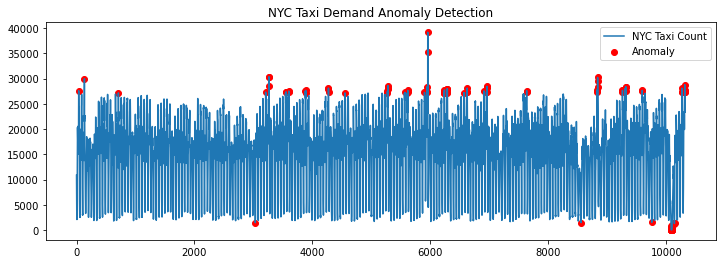

In [5]:
# Load NYC Taxi dataset
df_taxi = pd.read_csv(
    'https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv'
)

# Anomaly Detection
model_taxi = IsolationForest(contamination=0.01, random_state=42)
df_taxi['anomaly'] = model_taxi.fit_predict(df_taxi[['value']])
df_taxi['anomaly'] = df_taxi['anomaly'].map({1: 0, -1: 1})

# Visualization
plt.figure(figsize=(12, 4))
plt.plot(df_taxi.index, df_taxi['value'], label='NYC Taxi Count')
plt.scatter(df_taxi[df_taxi['anomaly'] == 1].index, df_taxi[df_taxi['anomaly'] == 1]['value'], color='red', label='Anomaly')
plt.title('NYC Taxi Demand Anomaly Detection')
plt.legend()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the 'value' column only
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['value']])

In [7]:
from sklearn.model_selection import train_test_split

# Split the scaled data
X_train, X_test = train_test_split(data_scaled, test_size=0.2, shuffle=False)

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

# Prepare data
X_train, X_test = train_test_split(data_scaled, test_size=0.2, shuffle=False)

# Define autoencoder
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1)

# Calculate reconstruction error
X_pred = autoencoder.predict(data_scaled)
recon_error = np.mean(np.square(data_scaled - X_pred), axis=1)

# Flag anomalies
threshold = np.mean(recon_error) + 3*np.std(recon_error)
data['recon_error'] = recon_error
data['ae_anomaly'] = data['recon_error'] > threshold

2025-09-08 15:58:42.606737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
511/511 [==============================] - 1s 1ms/step - loss: 0.0375 - val_loss: 2.4056e-06
Epoch 2/50
511/511 [==============================] - 1s 1ms/step - loss: 5.9158e-06 - val_loss: 1.3121e-06
Epoch 3/50
511/511 [==============================] - 1s 991us/step - loss: 2.2007e-06 - val_loss: 9.2693e-07
Epoch 4/50
511/511 [==============================] - 1s 1ms/step - loss: 1.1967e-06 - val_loss: 4.3045e-07
Epoch 5/50
511/511 [==============================] - 0s 848us/step - loss: 7.0895e-07 - val_loss: 2.1373e-07
Epoch 6/50
511/511 [==============================] - 0s 877us/step - loss: 6.7224e-07 - val_loss: 4.1931e-07
Epoch 7/50
511/511 [==============================] - 0s 882us/step - loss: 5.4202e-07 - val_loss: 1.2004e-07
Epoch 8/50
511/511 [==============================] - 0s 970us/step - loss: 6.1760e-07 - val_loss: 6.1849e-05
Epoch 9/50
511/511 [==============================] - 1s 1ms/step - loss: 3.2995e-06 - val_loss: 3.3727e-07
Epoch 10/50
511/511 [=

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale between 0-1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['value']])

# Create rolling windows
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(data_scaled, window=30)

# LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(30, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_lstm, y_lstm, epochs=30, batch_size=32)

# Prediction and error
y_pred = model.predict(X_lstm)
errors = np.abs(y_lstm - y_pred).flatten()
threshold = np.mean(errors) + 3 * np.std(errors)

# Anomaly labeling
anomalies_lstm = errors > threshold

Epoch 1/30
709/709 [==============================] - 6s 6ms/step - loss: 0.0194
Epoch 2/30
709/709 [==============================] - 4s 6ms/step - loss: 4.8182e-04
Epoch 3/30
709/709 [==============================] - 4s 6ms/step - loss: 2.7153e-04
Epoch 4/30
709/709 [==============================] - 5s 6ms/step - loss: 1.7872e-04
Epoch 5/30
709/709 [==============================] - 5s 6ms/step - loss: 1.5932e-04
Epoch 6/30
709/709 [==============================] - 5s 7ms/step - loss: 1.4206e-04
Epoch 7/30
709/709 [==============================] - 5s 6ms/step - loss: 1.3899e-04
Epoch 8/30
709/709 [==============================] - 5s 6ms/step - loss: 1.3116e-04
Epoch 9/30
709/709 [==============================] - 5s 7ms/step - loss: 1.2183e-04
Epoch 10/30
709/709 [==============================] - 5s 7ms/step - loss: 1.2484e-04
Epoch 11/30
709/709 [==============================] - 5s 7ms/step - loss: 1.1424e-04
Epoch 12/30
709/709 [==============================] - 5s 7ms/step 

In [18]:
import pandas as pd

# Choose file (can be changed to other NAB files)
filename = 'ambient_temperature_system_failure.csv'

url = f'https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv'
data = pd.read_csv(url)

# Timestamp parsing
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Preview
print(data.head())

                         value
timestamp                     
2013-07-04 00:00:00  69.880835
2013-07-04 01:00:00  71.220227
2013-07-04 02:00:00  70.877805
2013-07-04 03:00:00  68.959400
2013-07-04 04:00:00  69.283551


In [19]:
from sklearn.preprocessing import StandardScaler

# Scale the time-series value
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['value']])

# Optional: simulate label if not available (e.g., synthetic spike)
threshold = data['value'].mean() + 3 * data['value'].std()
data['true_label'] = (data['value'] > threshold).astype(int)  # pseudo-labeling

In [20]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
data['iso_anomaly'] = iso.fit_predict(data_scaled)
data['iso_anomaly'] = (data['iso_anomaly'] == -1).astype(int)

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test = train_test_split(data_scaled, test_size=0.2, shuffle=False)

input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

X_pred = autoencoder.predict(data_scaled)
data['recon_error'] = np.mean(np.square(data_scaled - X_pred), axis=1)

threshold = np.mean(data['recon_error']) + 3*np.std(data['recon_error'])
data['ae_anomaly'] = (data['recon_error'] > threshold).astype(int)

228/228 [==============================] - 0s 704us/step


In [23]:
# Ensure anomalies_lstm is a 1D NumPy array of integers
anomalies_lstm = anomalies_lstm.astype(int).flatten()

# Pad the top of the series to align with original time series length
padding = np.zeros(30, dtype=int)
full_lstm_anomaly = np.concatenate([padding, anomalies_lstm])

# Create the column safely
data['lstm_anomaly'] = full_lstm_anomaly[:len(data)]

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape for LSTM input
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(data_scaled, window=30)
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

# Train LSTM
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_seq.shape[1], 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_seq, y_seq, epochs=30, batch_size=32, verbose=0)

# Predict
y_pred = lstm_model.predict(X_seq)
error = np.abs(y_seq - y_pred.flatten())
threshold_lstm = np.mean(error) + 3*np.std(error)
anomalies_lstm = error > threshold_lstm

# Flatten to 1D integer array if needed
anomalies_lstm_flat = anomalies_lstm.astype(int).flatten()

# Create padding to align with original data
padding = np.zeros(30, dtype=int)
full_anomaly_series = np.concatenate([padding, anomalies_lstm_flat])

# Truncate to match DataFrame length
data['lstm_anomaly'] = full_anomaly_series[:len(data)]

227/227 [==============================] - 2s 8ms/step


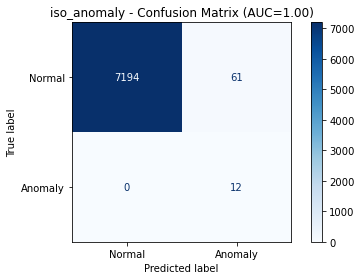

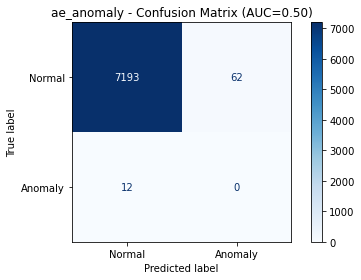

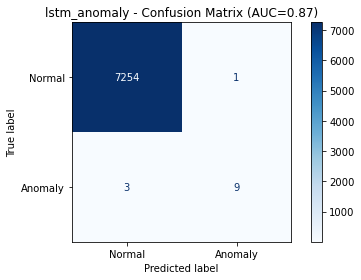

In [26]:
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = ['iso_anomaly', 'ae_anomaly', 'lstm_anomaly']

for model in models:
    y_true = data['true_label']
    y_pred = data[model]
    
    cm = confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
    disp.plot(cmap='Blues')
    plt.title(f'{model} - Confusion Matrix (AUC={auc:.2f})')
    plt.tight_layout()
    plt.show()

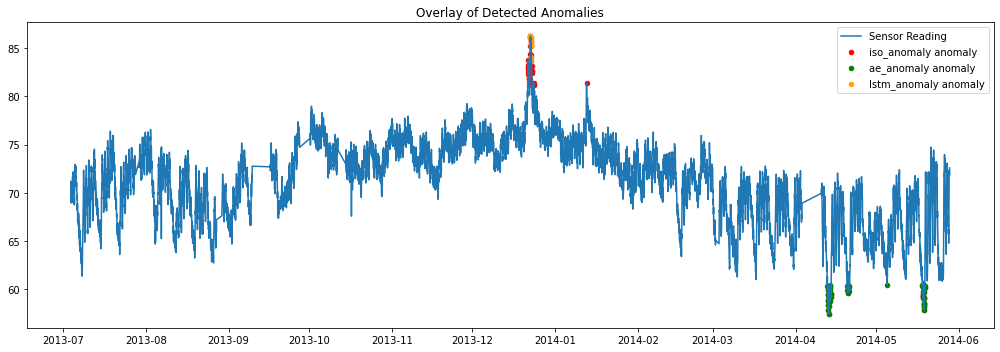

In [27]:
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['value'], label='Sensor Reading')

for model, color in zip(['iso_anomaly', 'ae_anomaly', 'lstm_anomaly'], ['red', 'green', 'orange']):
    plt.scatter(data.index[data[model] == 1], 
                data['value'][data[model] == 1],
                label=f"{model} anomaly", color=color, s=20)

plt.title("Overlay of Detected Anomalies")
plt.legend()
plt.tight_layout()
plt.show()